# London Bike-Sharing Demand Prediction with Random Forest Regressor

## 1. Introduction
The recent boom of bike-sharing system is a representative initiative of a sustainable transportation mode. At present, the bicycle-sharing system allows citizens to use bicycles for a short period of time when needed, without having to bear the ownership cost. It can be used as an alternative solution to get access to the public transport station such as bus stop and subway station. Besides, it can be helpful in dealing with traffic congestion, air pollution, energy shortage, and deterioration of citizens' health in urabn areas. However, how to implement the bike-sharing system successfully and efficiently has become a new challenge encounter to the bike-sharing system company and city planner. Xu et al. (2019) committed to exploring the space-time pattern of sharing bicycles in Singapore, a densely populated city. They has alos examined some factors which can help understanding the determinants of people's cycling activities, for instance, weather condition, built environment, weekdays or weekends and hour of a day. Zhu et al. (2020) has found the significant impact of the ﬂeet size, operational regulations (dockless versus docking), and weather conditions on the usage of bike-sharing systems and scooter-sharing systems. Linear regression as well as spatial analysis were employed in these studies and obtained a good validity and reliability of the conclusion. According to these previous studies, it is assumed in this research that the bike sharing are related with the hour of the day, weather conditions and season, and I intend to try to use machine learning regression model to predict the future demand for sharing bikes from these kind of information.

## 2. Data Exploration
The data is gathered from 3 sources:

Bike sharing usage dataset - https://cycling.data.tfl.gov.uk/

weather data - https://freemeteo.com 

official bank holidays in London - https://www.gov.uk/bank-holidays

After the data is grouped by hour and merged is published on "Kaggle" - https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset


### 2.1. Metadata Description:

**"timestamp":** timestamp field for grouping the data

**"cnt":** the count of a new bike shares

**"t1":** real temperature in Celsius

**"t2":** "feels like" temperature in Celsius or apparent temperature

**"hum":** humidity in percentage

**"wind_speed"**: wind speed in km/h

**"weather_code"**: category of the weather

**"is_holiday":** boolean field - 1 holiday / 0 non holiday

**"is_weekend":** boolean field - 1 if the day is weekend

**"season" category description:**
0 represented Spring, 
1 represented Summer, 
2 represented Autumn,
3 denoted to Winter.

**"weathe_code" category description:**
1 represented Clear; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity, 
2 denoted scattered clouds or few clouds, 
3 denoted Broken clouds, 
4 meant Cloudy, 
7 represented Rain or light Rain shower or Light rain, 
10 denoted rain with thunderstorm, 
26 meant snowfall,
94 represented Freezing Fog. 

In [360]:
# Ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data process and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from nose.tools import *

# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# regression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.svm import SVR

#model selection
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 


### 2.2. Data visualization

In [327]:
df=pd.read_csv(r'D:\Personal Files\Glasgow\OneDrive - University of Glasgow\GU\PTUA\Assignment\Data\input\2015_2016_london_bikesharing_merged.csv') # change to the correct data path
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [328]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [329]:
df.info

<bound method DataFrame.info of                  timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0      2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1      2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2      2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3      2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4      2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                    ...   ...  ...  ...    ...         ...           ...   
17409  2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410  2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411  2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412  2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413  2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  

In [330]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

The above table indicates that there are no missing values in the dataset.

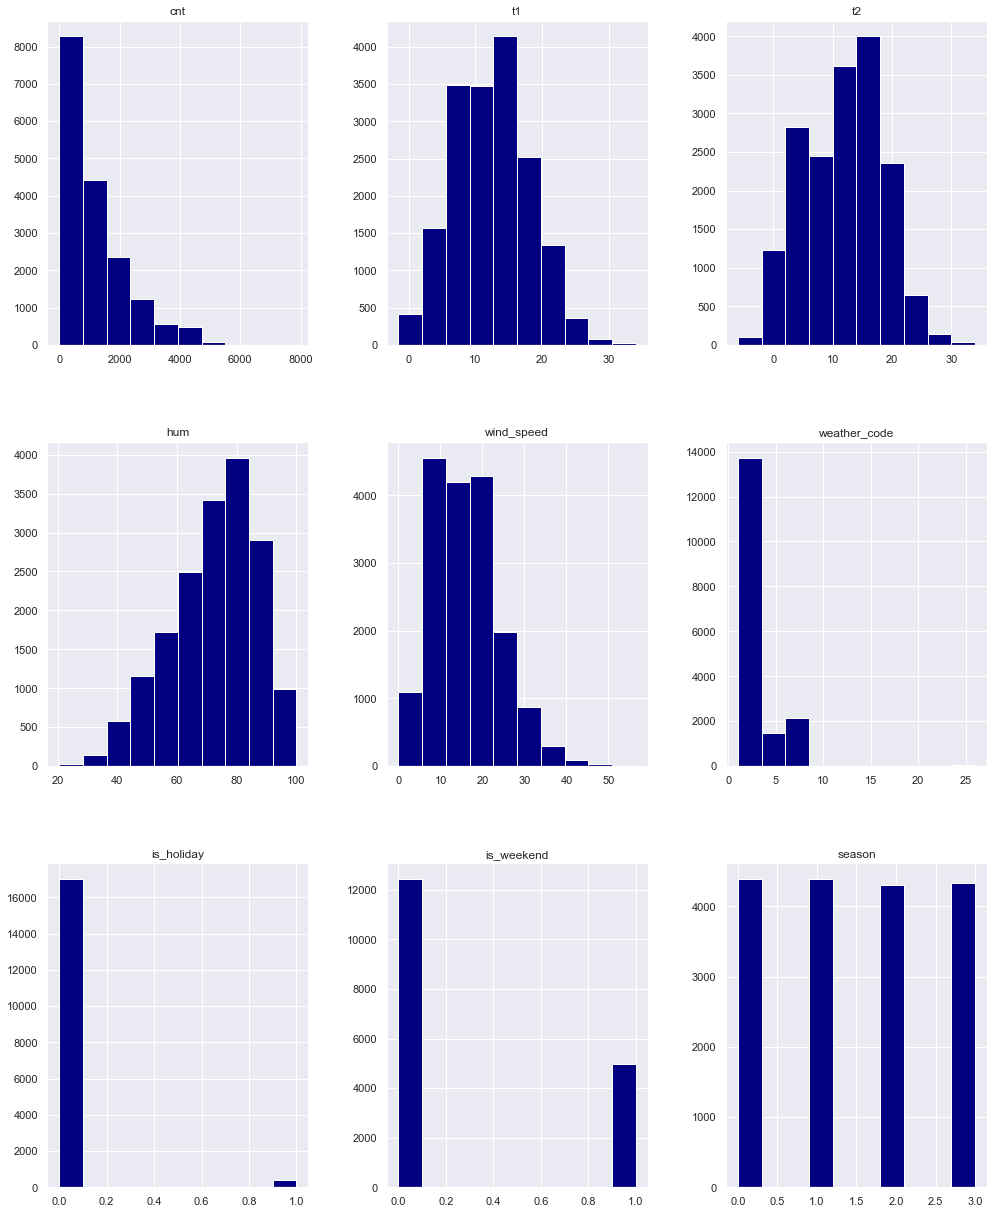

In [331]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(15,20))
df.hist(ax=ax, color='navy')
plt.show()

The distribution of "cnt" column does not looks like normal distribution. It is highly skewed at the left. Besides, the data contained zero values, therefore, I used "log1p" numpy function to transfer "cnt" column. The "log1p" added one to the data and  calculates the natural logarithm function. The variance and the effect of outliers in the data have been reduced by this transformation. The transformed data are shown in the distribution plot below. If the distribution of the dependent variable is more likely to normality, it will help the residuals distribution also to be more normality. In addition, the data looks highly imbalanced for the column "is_holiday, so does the data for "is_weekend". Therefore, I plan to group "is_holiday" and "is_weekend" in a new column to represent a working day or not. In terms of the column "is_weekend", the majority of data is for weekdays. For "season", it can be said that the number of data of each season was aproximately equal to each other. Furthermore, I also consider holiday as a factor which may affect the demand of sharing bike. It is obvious that the majority of data is for non holiday days. At last, the majority of data was for Clear with respect to column "weather_code". This makes sense because clear days are more appropriate for outdoor activities. Besides, the distribution of other columns ("t1", "t2", "hum", "wind_speed") looks good, doesn't need any transformations. 

In [332]:
df['count_log'] = np.log1p(df['cnt'])

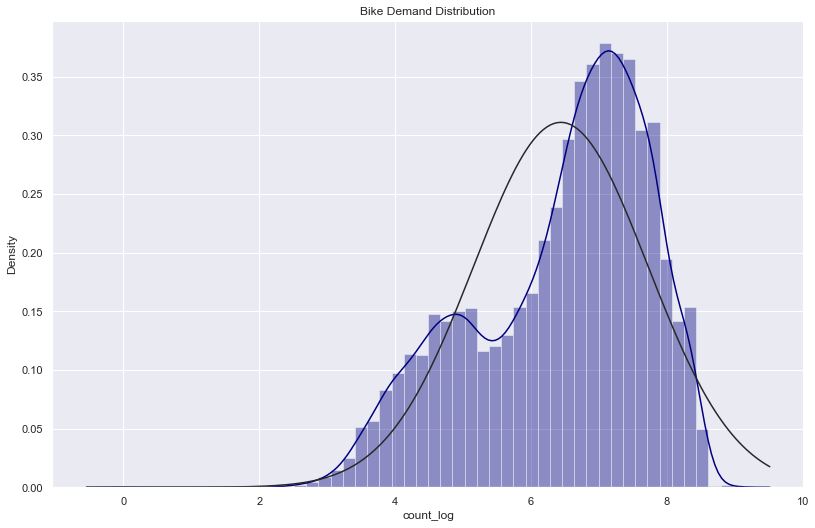

In [333]:
# look at the distribution of "cnt" column
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df['count_log'], fit=norm, ax=ax, color='navy')

(mu, sigma) = norm.fit(df['count_log']) # Get the fitted parameters used by the function

ax.set_title('Bike Demand Distribution')
plt.show()

For further exploration of the data, I created some new columns about time including date, hour of day, day of month, day of week and month for further analysis. 

In [334]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format ="%Y-%m-%d %H:%M:%S")

In [335]:
# add different types of time variable
df = df.set_index("timestamp")
df["date"] = df.index.date
df["hour"] = df.index.hour
df["day_of_month"] = df.index.day
df["day_of_week"]  = df.index.dayofweek
df["month"] = df.index.month

In [336]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,count_log,date,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,5.209486,2015-01-04,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,4.934474,2015-01-04,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,4.905275,2015-01-04,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,4.290459,2015-01-04,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,3.871201,2015-01-04,4,4,6,1


Now there are thirteen independent variables in the dataset. 

Then I did correlation analysis as follows:

<AxesSubplot:title={'center':'Correlation of Columns Heatmap'}>

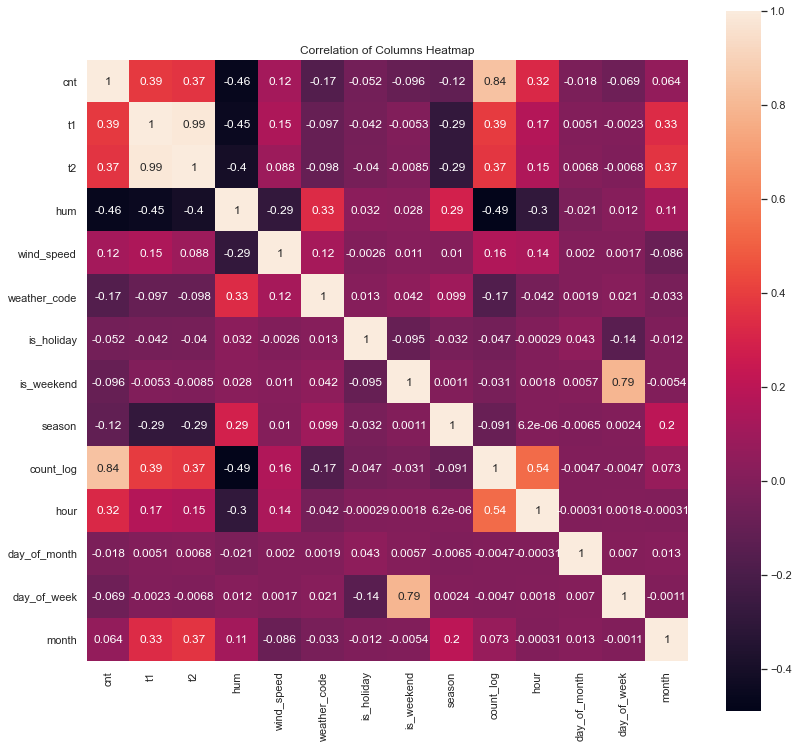

In [337]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Correlation of Columns Heatmap")
sns.heatmap(corrmat, square=True, annot=True, ax=ax)

Since the purpose of this research is to predict the demand of shaing bike, the count of bikes used everyday will be seen as the dependent variable and other factors will be seen as the independent variables. From the above heatmap, it can be seen that t1, t2 and hour had relatively high correlation coefficients with the demand for bike; however, t1 and t2 are highly correlated with each other. Therefore, it is not appropriate to set both of them as independent variables at the same time. Furthermore, it can be said from the heatmap that there was a obvious negtive relationship between the demand of bike and humidity and weather. The correlation coefficients of other variables were not significant. In further detailed analyses, I explored the distribution of bike demand based on the different date, month, day of the month, day of the week, hour, temperature, humidity, wind speed and weather. 

#### Date and and sharing bike demand

<AxesSubplot:xlabel='date', ylabel='cnt'>

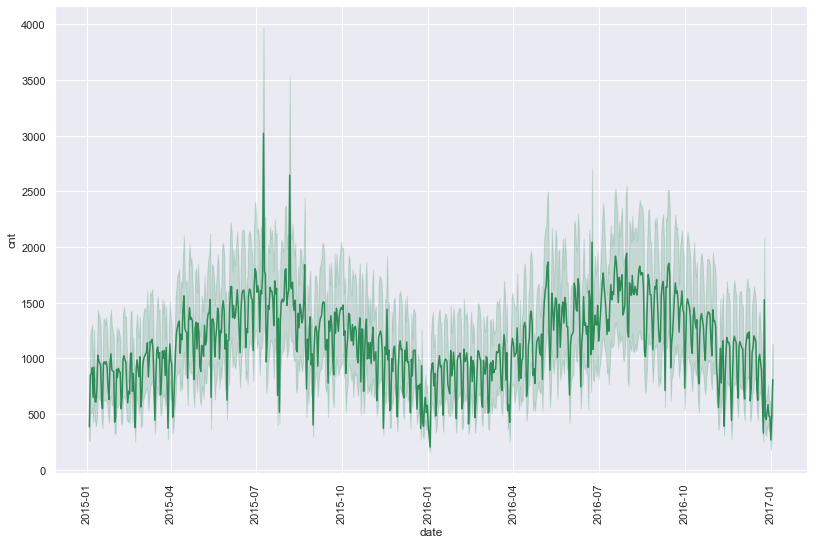

In [338]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.lineplot(data=df,x=df.date,y=df.cnt, color='seagreen')

The above figure demonstrates the variation of the bike usage during the dataset period. In some days in July and August 2015, the demand of sharing bike was extremely high. 

#### Month and and sharing bike demand

<AxesSubplot:xlabel='month', ylabel='cnt'>

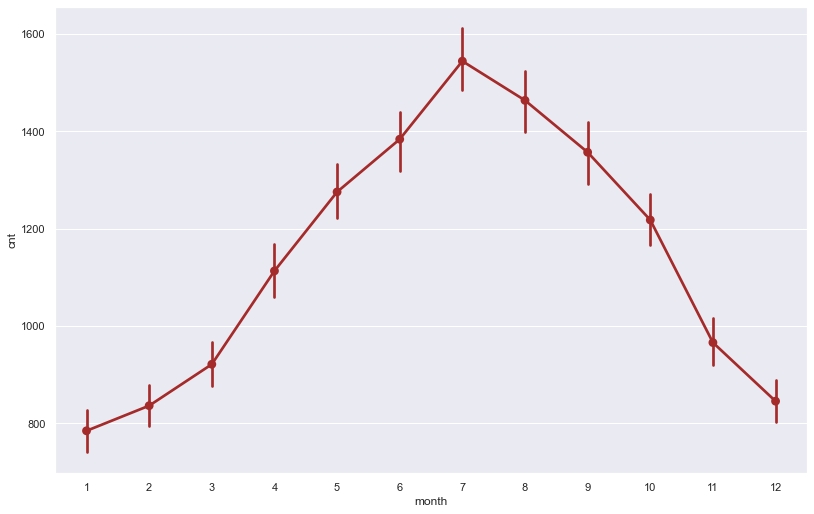

In [339]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df,x=df.month,y=df.cnt,color="brown")

The above line chart indicates that in the July the bike demand was on peak and then started to decrease. The reason may be that it was summer and most people would like to have an active travel in summer days. 

<AxesSubplot:xlabel='month', ylabel='cnt'>

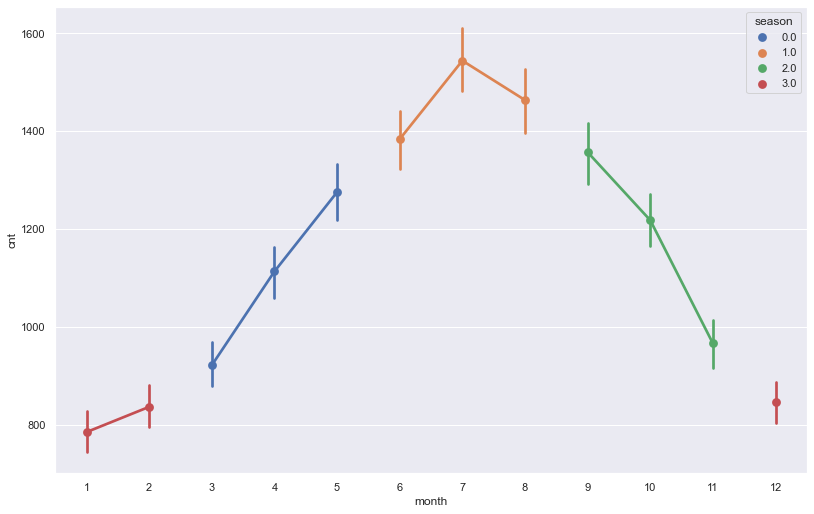

In [340]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df,hue=df.season,y=df.cnt,x=df.month)

<AxesSubplot:xlabel='season', ylabel='cnt'>

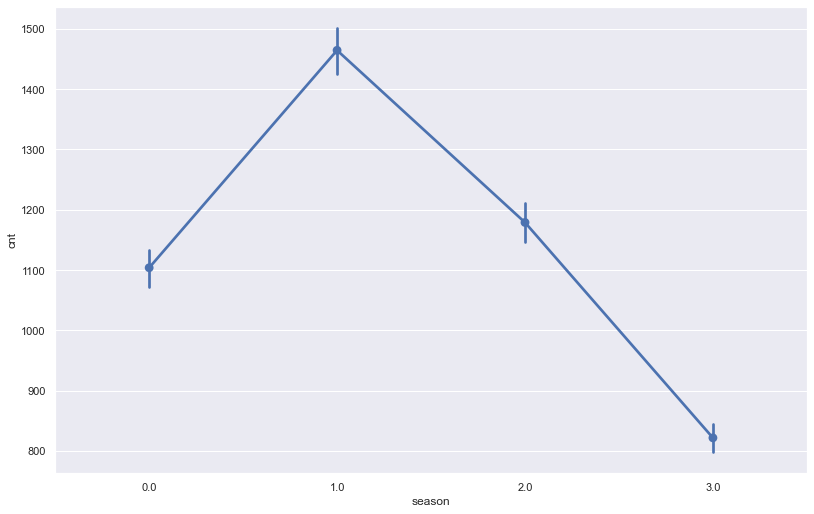

In [341]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df,y=df.cnt,x=df.season)

The above line chart confirmed that the reason why the demand for bike reached a peak in July was related to the season. What's more, it indicates that month is more or less correlated with season, and according to the correlation matrix above, season has a higher correlation coeficient with sharing bike demand than month.

#### Day of month

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

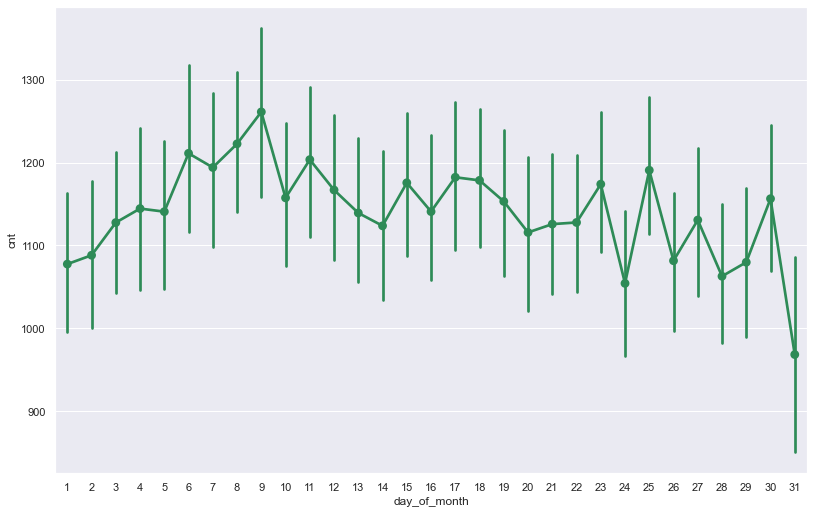

In [342]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df,x=df.day_of_month,y=df.cnt,color="seagreen")

From the plot abve, there is no obvious pattern between sharing bike usage and day of month.

#### Day of week and sharing bike demand

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

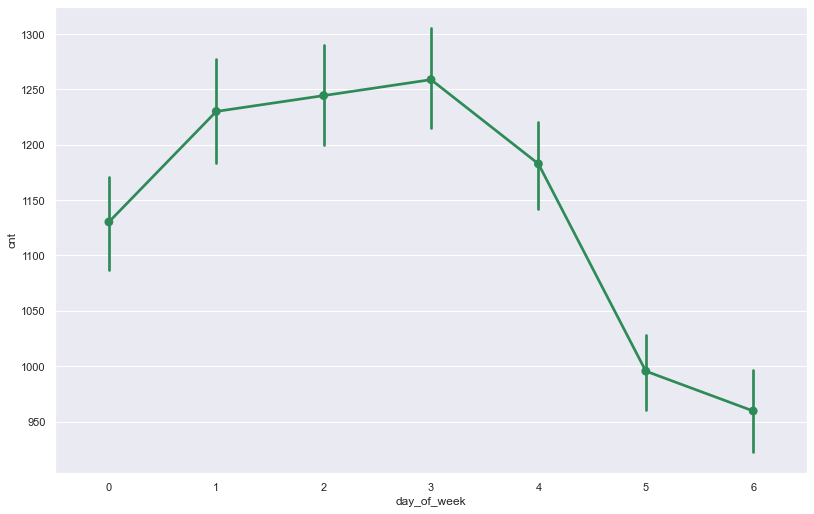

In [343]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df,x=df.day_of_week,y=df.cnt,color="seagreen")

From the point plot above, it can be said that the least bike demand came from weekend. So It is necessary to include the column "is_weekend" as an independent variable in the predict model. 

#### Hour and sharing bike demand

<AxesSubplot:xlabel='hour', ylabel='cnt'>

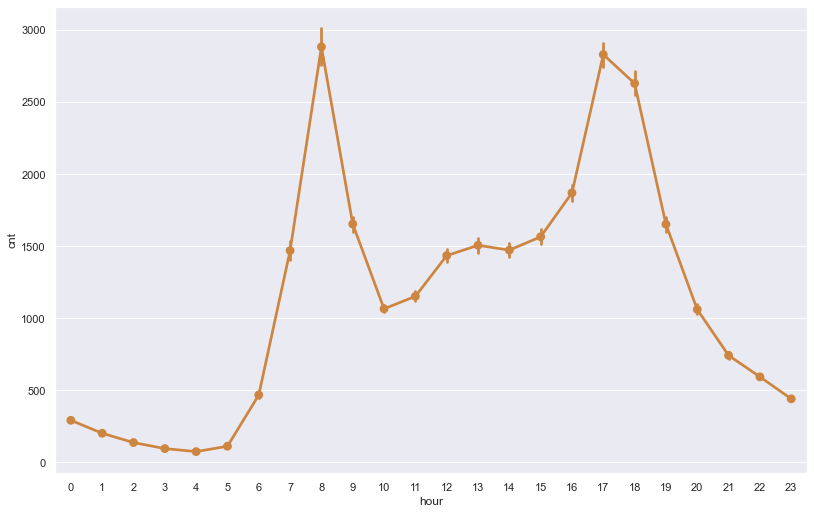

In [344]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=df,x=df.hour,y=df.cnt,color="peru")

From the line chart above, there were two peaks of the demand for bike: moring peak (around 8:00 to 9:00) and evening peak (around 17:00 to 18:00). 

<AxesSubplot:xlabel='hour', ylabel='cnt'>

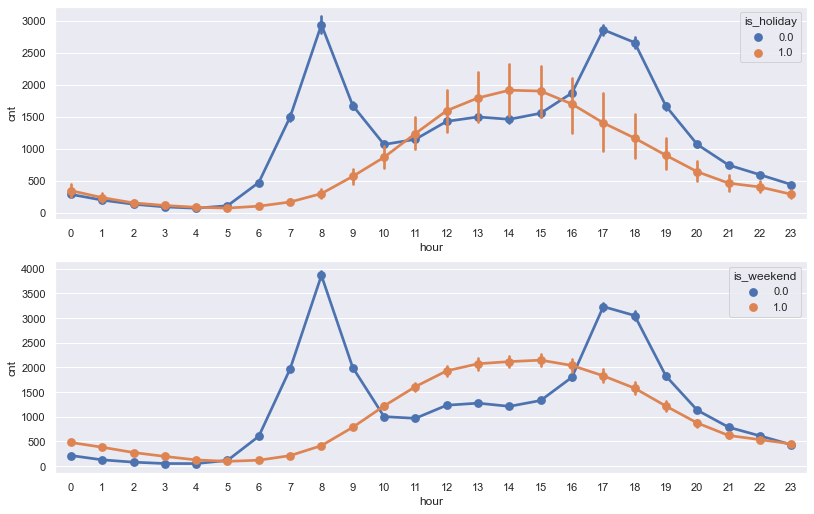

In [47]:
fig, ax = plt.subplots(2,1,figsize=(12, 8))
sns.pointplot(data=df,x=df.hour,y=df.cnt,hue=df.is_holiday, ax=ax[0])
sns.pointplot(data=df,x=df.hour,y=df.cnt,hue=df.is_weekend, ax=ax[1])

Besides, from the above line chart, it is obvious that for holiday and weekend, the distribution of bike usage was definitely different compared to workdays; however, the patterns of holiday and weekend were considerably similar to each other. In holiday and weekends, most people used bike-sharing system during noontime. This indicates that it was possible to concatenate these two variables. 

#### Weather

<AxesSubplot:xlabel='weather_code', ylabel='cnt'>

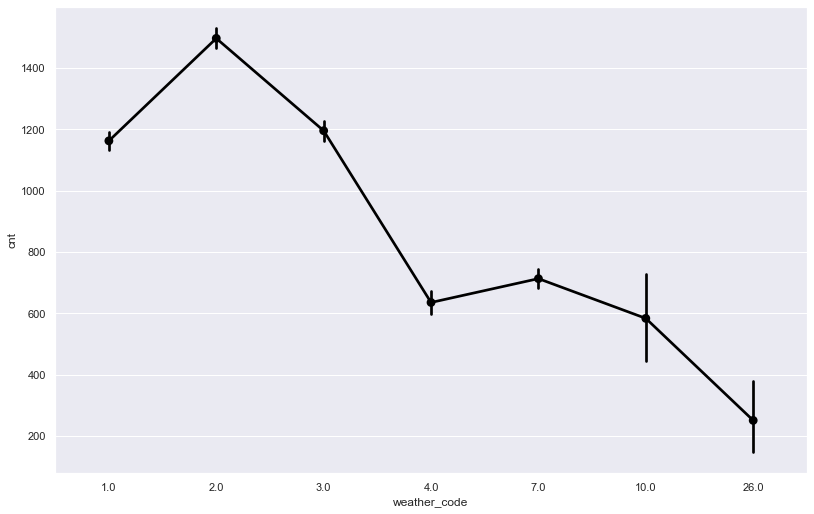

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(data=df, x='weather_code', y='cnt', color='black',ax=ax)

In addition, from the above point chart, maximal demands for bike occured in scattered coluds weather and the demand for bike decreased to lowest in snowfall weather. Next, I checked distribution of continous variables including humidity, wind_speed, and temperature.

#### Humidity

<AxesSubplot:xlabel='hum', ylabel='cnt'>

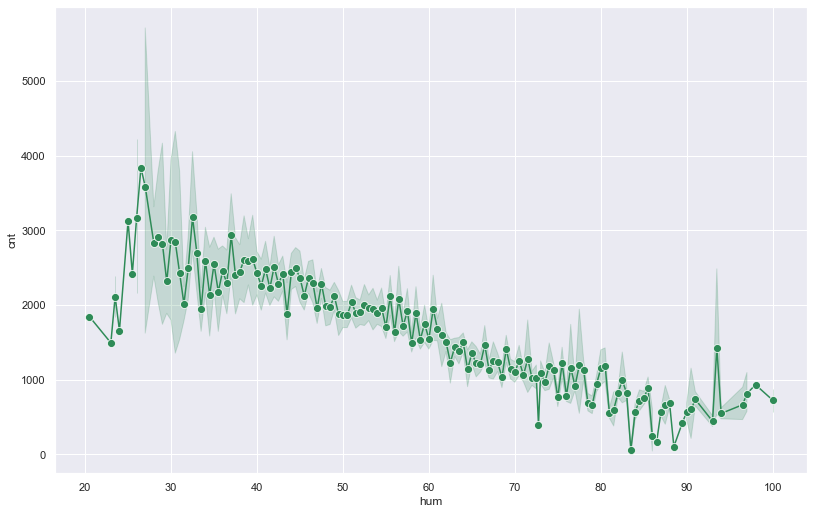

In [45]:
# humidity
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df,x=df.hum,y=df.cnt, marker = "o", markersize=8, color="seagreen", ax=ax)

It is obvious from the avove line chart that demand for bike decreased with increasing humidity.

#### Temperature

<AxesSubplot:xlabel='t1', ylabel='cnt'>

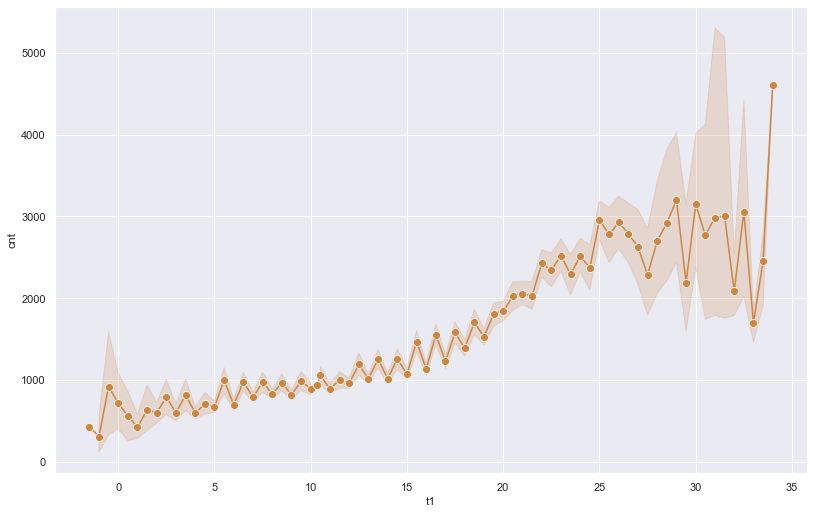

In [44]:
# temperature
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df,x=df.t1,y=df.cnt, marker = "o", markersize=8, color="peru", ax=ax)

The above line chart demonstrates the relationship between the demand for bike and the real temperature. It is obvious from the result that demand for bike increased with increasing temperature. The apparent temperature, "t2" was not used here due to the apparent temperature was highly related to real temperature and was affected by other variables like humidity. 

#### Wind Speed

<AxesSubplot:xlabel='wind_speed', ylabel='cnt'>

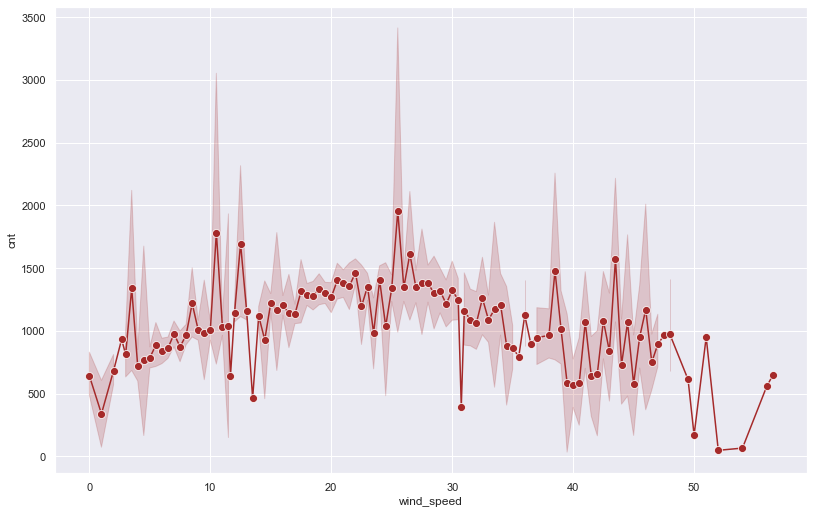

In [43]:
# wind_speed
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df,x=df.wind_speed,y=df.cnt, marker = "o", markersize=8, color="brown", ax=ax)

The line chart above indicates that the usage of bicycles decreased under light wind and high wind, and the usage of bicycles was higher at moderate wind speeds.

## 3. Feature Engineering
So far, I have examined all the variables in the dataset. In general, most of these variables were certainly associated with demand for sharing bike. Some variables such as date, day of month, day of week did not have significant impacts on sharing bike usage, therefore, I dropped these variables when doing feature engineering. Besides, as mentioned above, "t2" was highly correlated with "t1" which may cause the multicollinearity problem, so I excluded this variable too. In addition, since the effects of "is_holiday" and "is_weekend" on the demand for sharing bike were considerably similar to each other, and considering the imbalance of "is_holiday" data, I concatenated "is_holiday" and "is_weekend" as a new variable "not_workday". Then, there are some categorical variables such as "weather_code", "season" and "not_workday", which are needed to be transformed to dummy variables. Details of feature engineering are as follows:

### 3.1. Concatenate "is_holiday" and "is_weekend" and drop useless variables

In [68]:
# concatenate "is_holiday" and "is_weekend", new variable "not_workday"
df['not_workday'] = df['is_holiday'] + df['is_weekend']
df1 = df.drop(['is_holiday','is_weekend'],axis=1)
df1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,season,not_workday,count_log,date,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,3.0,1.0,5.209486,2015-01-04,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,3.0,1.0,4.934474,2015-01-04,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,3.0,1.0,4.905275,2015-01-04,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,3.0,1.0,4.290459,2015-01-04,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,3.0,1.0,3.871201,2015-01-04,4,4,6,1


In [152]:
london_df = df1.reset_index()
london_df = london_df.drop(['timestamp','cnt','t2', 'date', 'day_of_month', 'day_of_week'],axis=1)
london_df.head()

,t1,hum,wind_speed,weather_code,season,not_workday,count_log,hour,month
0,3.0,93.0,6.0,3.0,3.0,1.0,5.209486,0,1
1,3.0,93.0,5.0,1.0,3.0,1.0,4.934474,1,1
2,2.5,96.5,0.0,1.0,3.0,1.0,4.905275,2,1
3,2.0,100.0,0.0,1.0,3.0,1.0,4.290459,3,1
4,2.0,93.0,6.5,1.0,3.0,1.0,3.871201,4,1


### 3.2. Categorial variables to dummy variables
Since many machine learning algorithms cannot directly operate on categorical data. It is required to convert all input variables and output variables to be numeric form. Generally speaking, this is mainly a constraint on the effective implementation of the machine learning algorithm, rather than a strict restriction on the algorithm itself. Actually, the categorical variabls in this dataset have already been transformed to the numerical form, such as "season", "weather_code" and "not_workday". Compared to discrete ordinal variables such as "hour" and "month", "season", "weather_code" and "not_workday" are more like categorical variables without a natural ordering. Therefore, it is necessary to change the natural ordered form to one-hot encoding. 

In [153]:
col = ("weather_code", "season", "not_workday")

for c in col:
    london_df[c] = pd.get_dummies(london_df[c])
    
london_df.head()

,t1,hum,wind_speed,weather_code,season,not_workday,count_log,hour,month
0,3.0,93.0,6.0,0,0,0,5.209486,0,1
1,3.0,93.0,5.0,1,0,0,4.934474,1,1
2,2.5,96.5,0.0,1,0,0,4.905275,2,1
3,2.0,100.0,0.0,1,0,0,4.290459,3,1
4,2.0,93.0,6.5,1,0,0,3.871201,4,1


### 3.3. Correlation matrix
After creating a new feature and dropping some useless variables, I checked the correlation matrix of the variables in the dataset again. As shown below, the highest, positive correlation is between hour and sharing bike demand, while the highest negative correlation is between humidity and bike demand. Real temperature, month and wind speed are positively correlated with sharing bike demand while weather, season and "not_workday" are negatively correlated with sharing bike demand. Besides, it seems that the correlation coefficient of the new variable ("not_workday") has been increased compared to "is_holiday" and "is_weekend". 

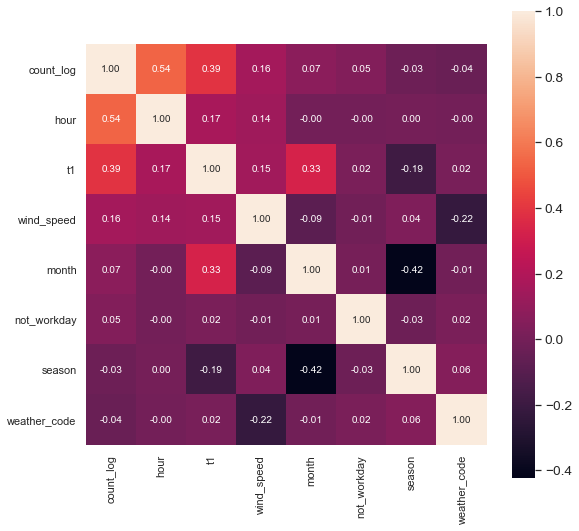

In [144]:
fig, ax = plt.subplots(figsize=(8,8))
k = 8 
corrmat = london_df.corr()
cols = corrmat.nlargest(k, 'count_log')['count_log'].index
cm = london_df[cols].corr()
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, ax=ax)
plt.show()

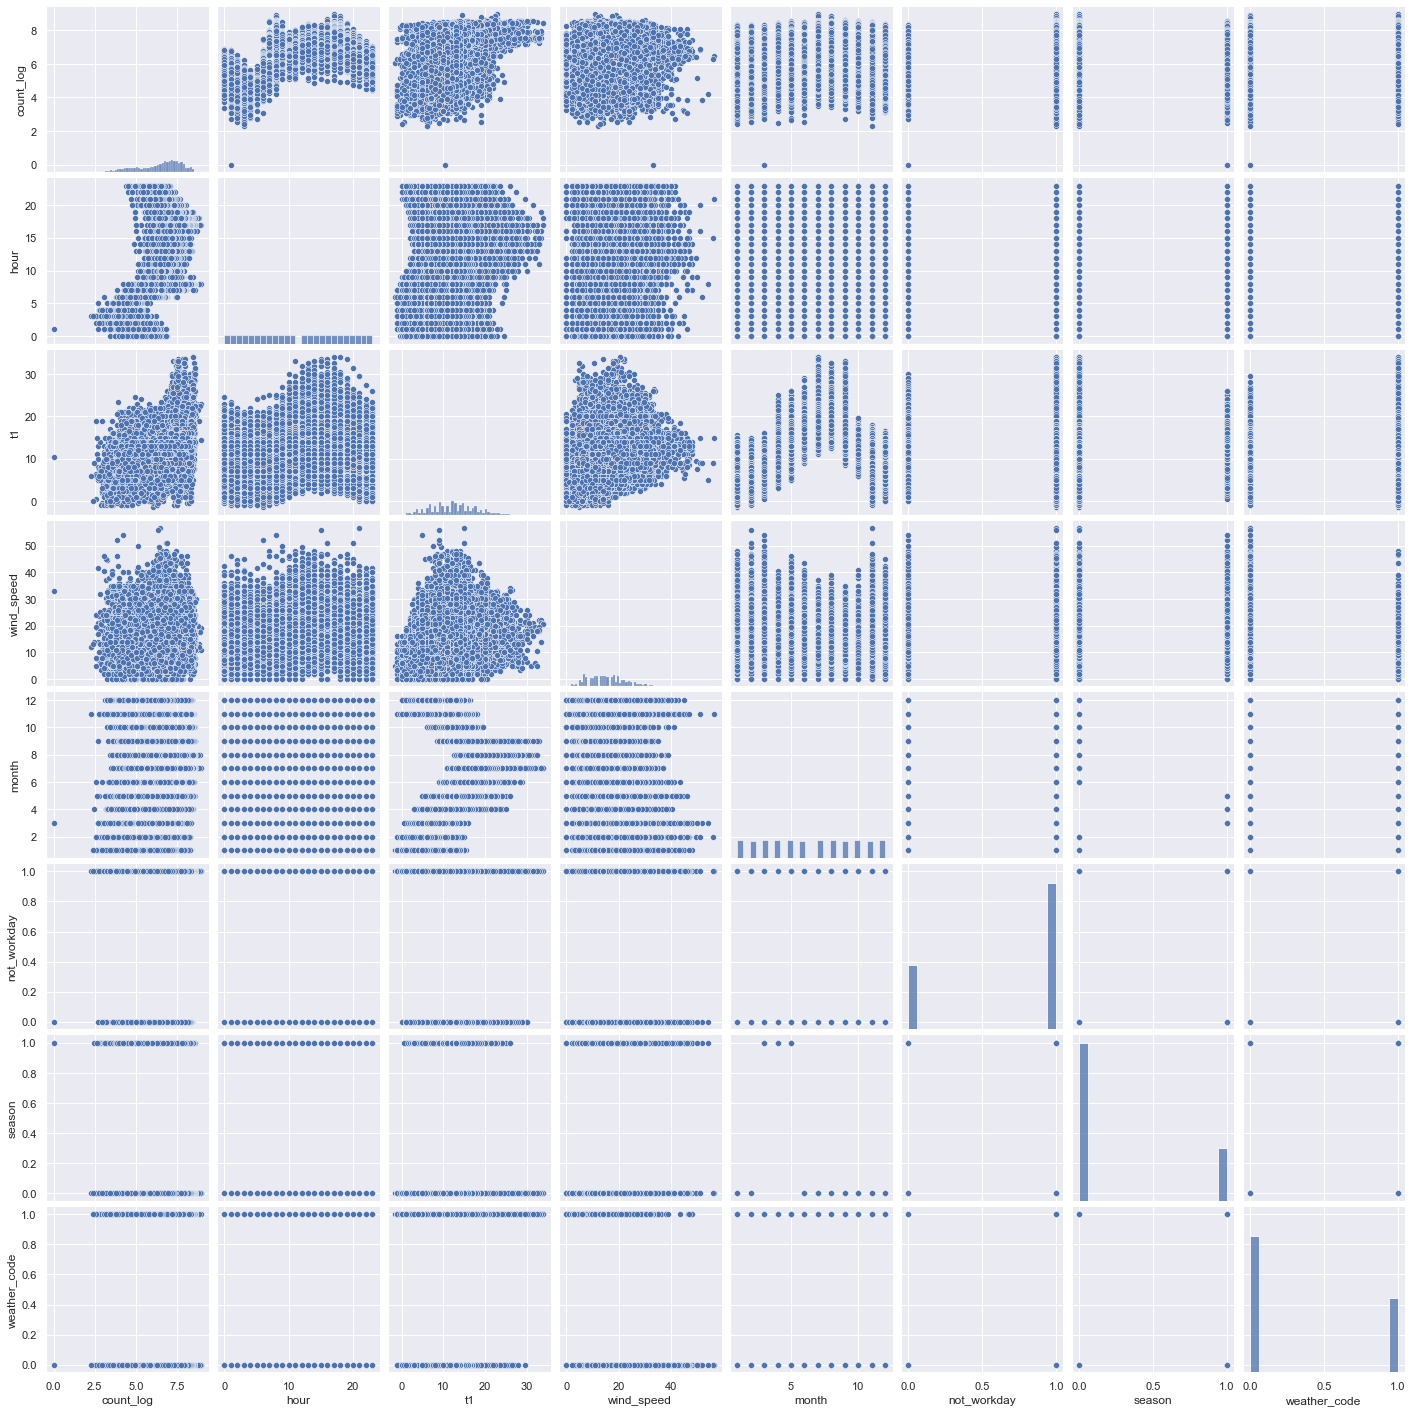

In [149]:
sns.set()
sns.pairplot(london_df[cols])
plt.show()

## 4. Machine learning

### 4.1. Train test data split
In this section, I separated the data into train and test sets. The training set and the test set is seventy percent and thirty percent of the total dataset respectively. I also splitted the training set for cross validation. Besides, for the scaling of the data is used the MinMaxScaler algorithm. 

In [345]:
x = london_df.drop(['count_log'], axis=1)
y = london_df['count_log']
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head()

,t1,hum,wind_speed,weather_code,season,not_workday,hour,month
0,0.126761,0.911950,0.106195,0.0,0.0,0.0,0.000000,0.0
1,0.126761,0.911950,0.088496,1.0,0.0,0.0,0.043478,0.0
2,0.112676,0.955975,0.000000,1.0,0.0,0.0,0.086957,0.0
3,0.098592,1.000000,0.000000,1.0,0.0,0.0,0.130435,0.0
4,0.098592,0.911950,0.115044,1.0,0.0,0.0,0.173913,0.0


In [346]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=21)

In [347]:
train_x.shape

(12189, 8)

In [348]:
train_y.shape

(12189,)

In [349]:
test_x.shape

(5225, 8)

In [350]:
test_y.shape

(5225,)

In [351]:
test_ID = test_x.index

Text(0.5, 0, 'Test set')

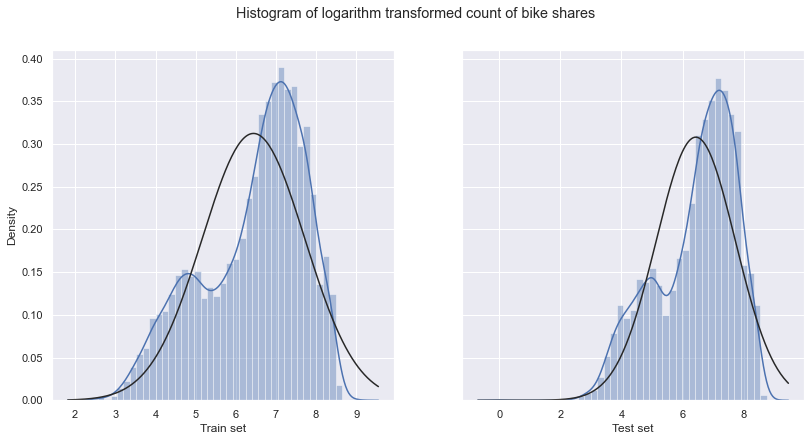

In [352]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6), sharey=True)
sns.distplot(pd.DataFrame(train_y), fit=norm, ax=ax1)
sns.distplot(pd.DataFrame(test_y), fit=norm, ax=ax2)
fig.suptitle("Histogram of logarithm transformed count of bike shares")
ax1.set_xlabel("Train set")
ax2.set_xlabel("Test set")

### 4.2. Model building
Before build a mahine learning model, a custom scoring function was implemented, Root mean squared logarithmic error (RMSLE), to check which model is better for analysing bike shares. Several models including ElasticNet, Lasso, Ridge, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor and SVR have been chosen as the candidate model since these models were quite often used in previous studies. Then, it proved that Random Forest Regression is more appropriate for this topic, therefore, a random forest model has been built. As results, the R squared value of the model reaches 0.9227. It indicates that the model can explain more than 92% variance of the demand for sharing bikes. Additionally, the RMSLE score of the train dataset is about 0.2529 which means that the standard deviation is about 1.29. While the RMSLE score of the test dataset is about 0.2952 which means that the standard deviation is about 1.34. Therefore, the upper and lower bounds of the probability interval calculated with plus or minus one standard deviation are 1.34 times as the actual predicted value. There is a little difference between the train set and the test set, which indicates the training data is a very good representation of the test data. In total, it can be said that the model performed considerably good.

In [353]:
# cross Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x)
    rmse= np.sqrt(-cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_log_error", cv = kf))
    return(rmse)

In [354]:
lasso = Lasso()
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Lasso score: 0.1878 (0.0011)


In [355]:
ridge = Ridge()
score = rmsle_cv(ridge)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Lasso score: 0.1380 (0.0009)


In [356]:
ENet = ElasticNet()
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f}({:.4f})".format(score.mean(), score.std()))

ElasticNet score: 0.1878(0.0011)


In [357]:
rf = RandomForestRegressor()
score = rmsle_cv(rf)
print("RandomForestRegressor score: {:.4f}({:.4f})".format(score.mean(), score.std()))

RandomForestRegressor score: 0.0421(0.0012)


In [183]:
br = BaggingRegressor()
score = rmsle_cv(br)
print("BaggingRegressor score: {:.4f}({:.4f})".format(score.mean(), score.std()))

BaggingRegressor score: 0.0437(0.0011)


In [185]:
abr = AdaBoostRegressor()
score = rmsle_cv(abr)
print("AdaBoostRegressor score: {:.4f}({:.4f})".format(score.mean(), score.std()))

AdaBoostRegressor score: 0.0717(0.0012)


In [187]:
svr = SVR()
score = rmsle_cv(svr)
print("SVR score: {:.4f}({:.4f})".format(score.mean(), score.std()))

SVR score: 0.1070(0.0007)


In [265]:
grid_param_rf = {'n_estimators': [10,100,500,750,1000,1200],
                'max_depth': [5,7,8,9],
                'min_samples_leaf': [5, 10, 25, 50],
                'max_features': ['auto', 'sqrt']}
param_grid=grid_param_rf
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_log_error")
grid_search_rf.fit(train_x, train_y)
grid_search_rf.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_leaf=5, n_estimators=750)

In [299]:
# Tuned RandomForest Model
RF_tuned = RandomForestRegressor(bootstrap=True, n_estimators=750, max_depth=9, min_samples_leaf=5, 
                                 random_state=42, max_features= 'auto')
RF_tuned.fit(train_x, train_y)

RandomForestRegressor(max_depth=9, min_samples_leaf=5, n_estimators=750,
                      random_state=42)

In [323]:
def plot_scores(model, test_x, test_y):
    assert(test_y.shape[0] == test_x.shape[0])
    prediction_test = np.expm1((model.predict(test_x).clip(min=0)))
    test_y = np.expm1(test_y)
    print("Root Mean Squared Error:" + str(np.sqrt(mean_squared_error(test_y, prediction_test))))
    print("Mean Absolute Error:" + str(mean_squared_error(test_y, prediction_test)))
    print("R^2 Coefficient of Determination:" + str(r2_score(test_y, prediction_test)))
    print("RMSLE:", np.sqrt(mean_squared_log_error(test_y, prediction_test)))

In [324]:
# Model evaluation on train set
print("Model evaluation on train set")
plot_scores(RF_tuned, train_x, train_y)

Model evaluation on train set
Root Mean Squared Error:285.0740886094412
Mean Absolute Error:81267.23599650353
R^2 Coefficient of Determination:0.9309095976553985
RMSLE: 0.2529147809167311


In [318]:
# Model evaluation on test set
print("Model evaluation on test set")
plot_scores(RF_tuned, test_x, test_y)

Model evaluation on test set
Root Mean Squared Error:301.9845094644401
Mean Absolute Error:91194.64395647854
R^2 Coefficient of Determination:0.922720813688769
RMSLE: 0.29520375121462444


In [311]:
pred = np.expm1(RF_tuned.predict(test_x))
ensemble = pred

In [312]:
# Save prediction data
sub = pd.DataFrame()
sub['ID'] = test_ID
sub['bike_demand'] = ensemble
sub.to_csv('bike_demand_prediction.csv', index=False)

### 4.3. Feature importance
In this section, I explored the feature importance. It has been found that hour is the variable which has the most significant impact on bike shares, and not_workday, real temperature and humidity also have some impacts on bike shares. It is a litte surprised that season and weather does not have so much effects on bike shares as I expected before. Considering their correlation with temperature and humidity, it may be possible to make a more simple model, which will be without these factors, to predict the demand for sharing bike in future. However, it needs more further studies.

In [303]:
def plot_importance(model):
    assert_is_not_none(model.feature_importances_)
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, train_x.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance %s'%model)
    plt.show

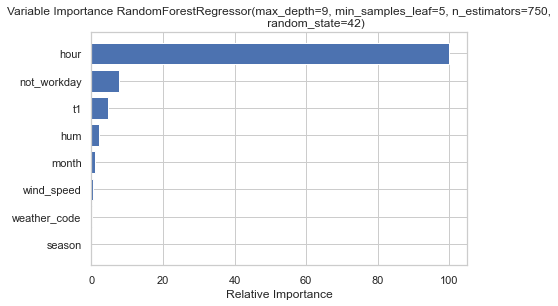

In [304]:
plot_importance(RF_tuned)

## Conclusion
The findings indicate there were two peaks of the demand for bike: moring peak (around 8:00 to 9:00) and evening peak (around 17:00 to 18:00) in London area, and this is the most important factor in predicting the usage of bikes. It also suggests that the majority purpose of using bike-sharing systems was for commuting. Besides, the demand for bike is quite different in weekdays and holidays, and this factor also plays an important role in the model that predicts the demand for bicycles. Another two important factors are humiditi and temperature, the demand for bikes reaches the highest in 20%-30% humidity and 30-35 degrees Celsius. In terms of month, the highest demand occured in July and August which were in summer days. THe reason might be that most people would like to have an active travel in summer days. In addition, demands for bike increase in scattered coluds weather not in clear weather, and this indicates that scattered cloud weather is more appropriate than clear weather for doing active travel. This is not the same as common sense, and this is another reason why we need data analysis to help bike-sharing systems manager and city planner knowing patterns of people's behaviour. 

It can be seen that Random Forest Regressor works well on the data and the prediction of bike demand are meaningful and useful. It can help bike-sharing companies to adjust the number of bicycles on the street and help policymakers formulate appropriate policies to encourage people to use bicycles for trave. Alough the model built in this research has performed quite well, it is still necessary to improve the performance of the model with more sharing-bike data including data for other years and spatial data which can be used to analyse the spatial pattern of sharing-bike usage. With a better prediction model, I believe predictions on the usage of shared bikes will be more accurate and that will be more useful for bike-sharing systems providers and policymakers. 

## References
Mehrotra, R. 2019. BIKE SHARING DEMAND[ RMSLE:: 0.3194], Kaggle, url:https://www.kaggle.com/rajmehra03/bike-sharing-demand-rmsle-0-3194 [accessed 20/03/2020]

Goyal, Y. 2020. Advanced visualizations and Predictions with LSTM, Kaggle, url:https://www.kaggle.com/yashgoyal401/advanced-visualizations-and-predictions-with-lstm [accessed 17/03/2020]

Hristo, H. 2020. Bike sharing prediction - RF/XGboost, Kaggle, url:https://www.kaggle.com/hmavrodiev/bike-sharing-prediction-rf-xgboost [accessed 10/03/2020]

Xu, Y., Chen, D., Zhang, X., Tu, W., Chen, Y., Shen, Y. & Ratti, C. 2019. Unravel the landscape and pulses of cycling activities from a dockless bike-sharing system. Computers, Environment and Urban Systems, 75, 184-203.

Zhu, R., Zhang, X., Kondor, D., Santi, P. & Ratti, C. 2020. Understanding spatio-temporal heterogeneity of bike-sharing and scooter-sharing mobility. Computers, Environment and Urban Systems, 81.

Stojiljković, M. 2021. Linear Regression in Python, Real Python, url:https://realpython.com/linear-regression-in-python/#conclusion [accessed 15/03/2020]

Brownlee, J. 2020. Why One-Hot Encode Data in Machine Learning?  Machine Learning Mastery, url:https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/ [accessed 21/03/2020]

Saxena, S. 2019. What’s the Difference Between RMSE and RMSLE? Medium.com, url:https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a [accessed 16/03/2020]